In [ ]:
!pip install pillow
!pip install lime
from PIL import Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=f4b713b785367bd618b63940601cf99a0ef6f440ef568161533a909f9eb41ee9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import lime
from lime import lime_image

model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
img_path = 'ball.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=10)[0])

FileNotFoundError: [Errno 2] No such file or directory: 'ball.jpg'

In [ ]:
img_path = 'birb.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 223ms/step
Predicted: [('n01530575', 'brambling', 0.96028036), ('n01534433', 'junco', 0.03573142), ('n01592084', 'chickadee', 0.003377855)]


In [ ]:
img_path = 'LIMETEST.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 218ms/step
Predicted: [('n03670208', 'limousine', 0.5177531), ('n03930630', 'pickup', 0.2687754), ('n02814533', 'beach_wagon', 0.09106139)]


In [ ]:
import time

def preprocess_image(image_path):
    img = keras.utils.load_img(image_path, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def predict_fn(images):
    preprocess_input(images)
    return model.predict(images)

# img_path = 'list.jpg'

# img = preprocess_image(img_path)

# preds = model.predict(img)

# print('Predicted:', decode_predictions(preds, top=3)[0])

explainer = lime_image.LimeImageExplainer()

img = keras.utils.img_to_array(keras.utils.load_img(('cat.jpg'), target_size=(224, 224)))

start_time = time.time()

explanation1 = explainer.explain_instance(img,
                                         predict_fn,
                                         top_labels = 1,
                                         hide_color = 0,
                                         num_features = 15,
                                         num_samples = 15000)

print(f"LIME explanation time: {time.time() - start_time} seconds")

  0%|          | 0/15000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step
LIME explanation time: 453.65749168395996 seconds


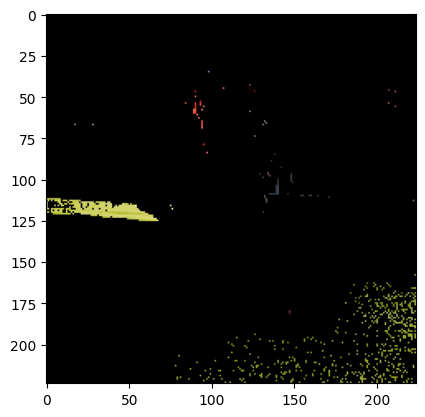

In [ ]:
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

temp1, mask1 = explanation1.get_image_and_mask(explanation1.top_labels[0],
                                            positive_only = True,
                                            negative_only = False,
                                            num_features = 15,
                                            hide_rest = True)

# plt.imshow(mark_boundaries(temp1 / 255, mask1, mode = 'inner'))
# plt.imshow(temp1 / 255)

# get (i, j) positions of all RGB pixels that are black (i.e. [0, 0, 0])
black_pixels = np.where(
    (temp1[:, :, 0] == 0) &
    (temp1[:, :, 1] == 0) &
    (temp1[:, :, 2] == 0)
)

# set those pixels to white
# temp1[black_pixels] = [220, 220, 220]
temp1[black_pixels] = [0, 0, 0]

plt.imshow(temp1 / 255)

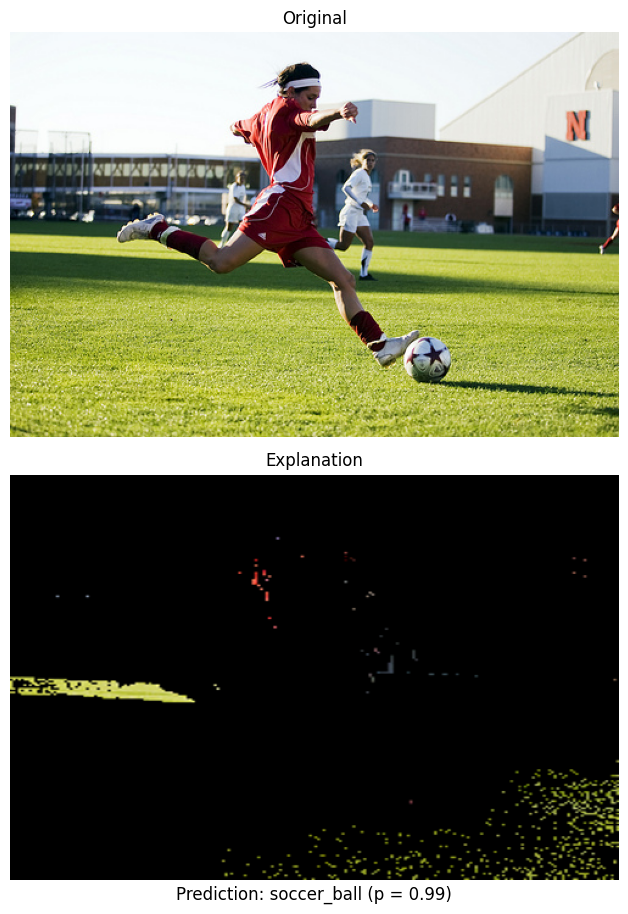

In [ ]:
img = keras.utils.load_img('ball.jpg')
exp = (temp1).astype(np.uint8)
exp = Image.fromarray(exp)
exp = exp.resize((img.size[0], img.size[1]))

fig, axs = plt.subplots(2, 1, figsize=(18, 9))

axs[0].imshow(img)
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(exp)
axs[1].set_title('Explanation')
axs[1].axis('off')

# Hide x and y axis labels
for ax in axs:
    ax.label_outer()

fig.text(0.5, 0, 'Prediction: soccer_ball (p = 0.99)', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 323ms/step
Predicted: [('n01530575', 'brambling', 0.96028036), ('n01534433', 'junco', 0.03573142), ('n01592084', 'chickadee', 0.003377855)]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


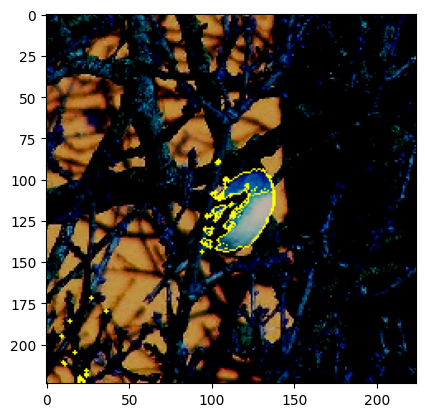

In [ ]:
img_path = 'birb.jpg'

img = preprocess_image(img_path)

preds = model.predict(img)

print('Predicted:', decode_predictions(preds, top=3)[0])

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img[0],
                                         predict_fn,
                                         top_labels = 5,
                                         hide_color = 0,
                                         num_samples = 1000)

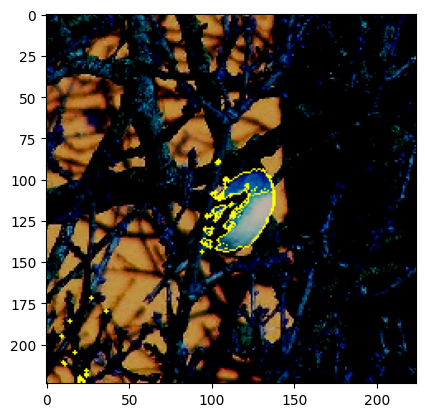

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                            positive_only = True,
                                            negative_only = False,
                                            num_features = 10,
                                            hide_rest = False)

plt.imshow(mark_boundaries((temp / 2 + 0.5) * 0.01, mask))

1/1 [==============================] - 0s 212ms/step
Predicted: [('n03670208', 'limousine', 0.5177531), ('n03930630', 'pickup', 0.2687754), ('n02814533', 'beach_wagon', 0.09106139)]


  0%|          | 0/1500 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


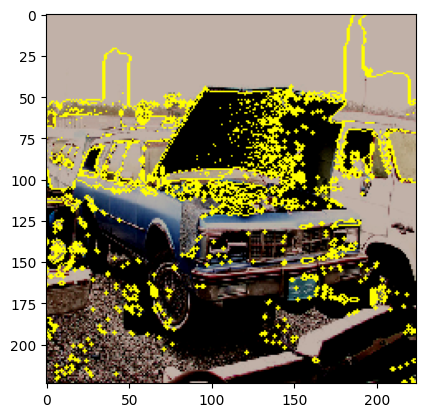

In [ ]:
img_path = 'LIMETEST.jpg'

img = preprocess_image(img_path)

preds = model.predict(img)

print('Predicted:', decode_predictions(preds, top=3)[0])

explainer = lime_image.LimeImageExplainer()

explanation2 = explainer.explain_instance(img[0],
                                         predict_fn,
                                         top_labels = 5,
                                         hide_color = 0,
                                         num_samples = 1500)

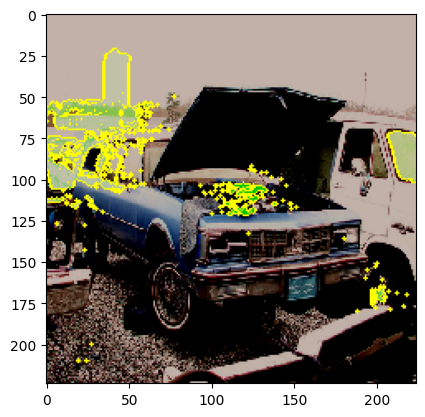

In [ ]:
temp2, mask2 = explanation2.get_image_and_mask(explanation2.top_labels[0],
                                            positive_only = False,
                                            negative_only = False,
                                            num_features = 10,
                                            hide_rest = False)

plt.imshow(mark_boundaries((temp2 / 2 + 0.5) * 0.01, mask2))